## 라이브러리 불러오기

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import FinanceDataReader as fdr

<AxesSubplot:title={'center':'한글'}>

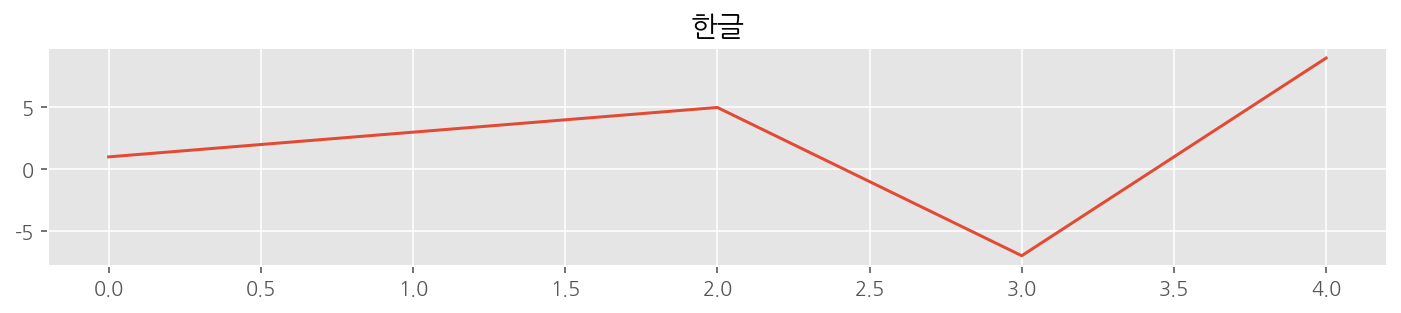

In [43]:
# 한글폰트 확인하기
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
pd.Series([1,3,5,-7,9]).plot(title="한글",figsize=(12,2))

## 데이터 불러오기

In [44]:
# 오류 메세지 무시
import warnings
warnings.filterwarnings('ignore')

### 코스피 200기업 종목 추출하기

In [45]:
KOSPI200 = pd.read_csv('https://github.com/chohj118/book_recommend/files/10526134/KOSPI_STOCK.csv')

In [46]:
codename = KOSPI200[['종목코드','종목명']]
codename['종목코드'].astype('object')

0       25850
1       71970
2       17900
3        1210
4       84010
        ...  
324      4800
325    298050
326    298020
327     93370
328     81660
Name: 종목코드, Length: 329, dtype: object

In [47]:
# 종목코드 6자리로 반환하기
def six_digit(x):
    return '%06d' % x
codename['종목코드'] = codename['종목코드'].apply(six_digit)

In [48]:
# 종목코드 내림차순 정렬
codename = codename.sort_values(by='종목코드' , ascending=False)

In [49]:
# 데이터 프레임에서 종목코드와 종목명만 추출하기
codename.columns = ['Symbol', 'Name']
codename.values.tolist()[0]

['402340', 'SK스퀘어']

In [50]:
codename[codename['Name']=='']

,Symbol,Name


In [51]:
# 종목코드만 추출하기
codename.columns = ['Symbol', 'Name']
c_list = codename['Symbol']
c_list

175    402340
138    383220
266    381970
265    377300
137    375500
        ...  
281    000080
233    000070
217    000060
72     000050
80     000030
Name: Symbol, Length: 329, dtype: object

### FinanceDataReader에서 주가 데이터 추출하기

In [52]:
# krx 상장종목 모두 가져오기
df_krx = fdr.StockListing("KRX")
df_krx.head(2)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64600,1,700,1.10,64400,65000,63900,18760182,1212764792491,385647952730000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,506000,2,-11000,-2.13,525000,526000,504000,459245,235054829000,118404000000000,234000000,STK


In [53]:
# krx 전체 상장 종목중 KOSPI 상장 종목 추출하기
df_KOSPI = df_krx['Market'] == 'KOSPI'
KOSPI = df_krx[df_KOSPI]
KOSPI.head(2)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64600,1,700,1.10,64400,65000,63900,18760182,1212764792491,385647952730000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,506000,2,-11000,-2.13,525000,526000,504000,459245,235054829000,118404000000000,234000000,STK


In [54]:
# KOSPI 200 기업 추출하기
KOSPI_200 = KOSPI[KOSPI['Code'].isin(c_list)]
KOSPI_200 = KOSPI_200.sort_values(by='Code' , ascending=False)
KOSPI_200.head(2)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
59,402340,KR7402340004,SK스퀘어,KOSPI,,37700,1,300,0.80,37150,38050,37000,550261,20730024900,5333327426700,141467571,STK
56,383220,KR7383220001,F&F,KOSPI,,147000,1,1100,0.75,145900,148500,141800,217752,31672451500,5631140025000,38307075,STK


In [55]:
# 코스피 200 기업 종목코드 추출
code_list = KOSPI_200['Code'].values.tolist()
len(code_list)

309

In [56]:
# 코스피 200 기업 종목명 추출
name_list = KOSPI_200['Name'].values.tolist()
len(name_list)

309

### 반복문을 사용해 코스피200 종목 주가 데이터프레임 저장

In [57]:
# 모든 종목의 주가를 저장
df = []
for i in range(len(code_list)):
    stock = fdr.DataReader(code_list[i],'2011')
    df.append(stock)


In [58]:
# 데이터프레임에 종목코드 추가
for i in range(len(code_list)):
    df[i]['Code'] = code_list[i]

In [59]:
# 데이터프레임에 종목명 추가
for i in range(len(name_list)):
    df[i]['Name'] = name_list[i]

In [60]:
# 모든 데이터프레임을 병합
df_200 = pd.concat(df)

In [61]:
# 병합한 데이터를 미리보기
df_200.sample(5)

,Open,High,Low,Close,Volume,Change,Code,Name
Date,,,,,,,,
2016-10-26,127000,127500,125000,127500,5857,-0.00,000070,삼양홀딩스
2021-03-08,38100,38150,37550,37800,263107,0.00,016360,삼성증권
2021-07-29,8040,8070,8010,8030,412805,0.00,003410,쌍용C&E
2021-12-13,8690,8780,8650,8660,603238,-0.00,138930,BNK금융지주
2014-10-08,5810,6040,5810,6040,85298,0.03,004430,송원산업


In [62]:
# 인덱스를 제거하고 컬럼에 추가
df_200 = df_200.reset_index()

In [63]:
# 파생변수 추가
df_200["연도월"] = df_200["Date"].astype(str).str[:7]
df_200['연도'] = df_200['Date'].dt.year

In [64]:
# 컬럼명 변경하기
df_200.columns=['날짜' , '시가' , '고가' , '저가' , '종가' , '거래량' , '등락률' , '종목코드' , '종목명' , '연도월' , '연도']
df_200['등락률'] = df_200['등락률']*100
df_200.head()

,날짜,시가,고가,저가,종가,거래량,등락률,종목코드,종목명,연도월,연도
0,2021-11-29,82000,85000,73900,76000,8764092,NaN,402340,SK스퀘어,2021-11,2021
1,2021-11-30,77900,80500,68000,68000,6863151,-10.53,402340,SK스퀘어,2021-11,2021
2,2021-12-01,68400,69400,61900,62700,4481654,-7.79,402340,SK스퀘어,2021-12,2021
3,2021-12-02,61900,72100,61500,68700,7312303,9.57,402340,SK스퀘어,2021-12,2021
4,2021-12-03,67400,70200,65500,66000,3301896,-3.93,402340,SK스퀘어,2021-12,2021


In [65]:
# float 타입을 소수점 둘째자리 까지만 출력
pd.options.display.float_format = '{:.2f}'.format

In [66]:
# 종목별 연도 종가 평균구하기
stock = df_200.groupby(['종목명','종목코드','연도']).agg({'종가':'mean'})
stock

종가
종목명   종목코드   연도           
AK홀딩스 006840 2011 25120.61
             2012 21604.83
             2013 30472.49
             2014 59964.40
             2015 83658.87
...                    ...
휴비스   079980 2019  7010.33
             2020  6777.62
             2021  9793.63
             2022  6470.12
             2023  4927.22

[3685 rows x 1 columns]

In [80]:
stock = stock.reset_index()

In [67]:
esg = pd.read_csv("../data/ESG_KOSPI200_ca.csv")

,종목코드,종목명,ESG등급,환경,사회,지배구조,평가년도,ESG등급_ca,환경_ca,사회_ca,지배구조_ca
0,3640,유니온스틸,B이하,B,B이하,B+,2014.00,2.00,3.00,2.00,5.00
1,3640,유니온스틸,B이하,B,B이하,B이하,2013.00,2.00,3.00,2.00,2.00
2,3640,유니온스틸,B이하,B,B이하,B+,2012.00,2.00,3.00,2.00,5.00
3,3640,유니온스틸,NaN,C,NaN,B이하,2011.00,NaN,1.00,NaN,2.00
4,64420,케이피케미칼,A,B+,A,A,2012.00,6.00,5.00,6.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...
2219,69960,현대백화점,B+,B+,B+,B이하,2015.00,5.00,5.00,5.00,2.00
2220,69960,현대백화점,B이하,B+,B+,B이하,2014.00,2.00,5.00,5.00,2.00
2221,69960,현대백화점,B이하,B,B+,B이하,2013.00,2.00,3.00,5.00,2.00
2222,69960,현대백화점,B이하,B+,B+,B이하,2012.00,2.00,5.00,5.00,2.00


In [89]:
esg['연도'] = esg['평가년도']

In [68]:
# esg 종목코드 6자리로 변경
esg['종목코드'] = esg['종목코드'].apply(six_digit)
esg

,종목코드,종목명,ESG등급,환경,사회,지배구조,평가년도,ESG등급_ca,환경_ca,사회_ca,지배구조_ca
0,003640,유니온스틸,B이하,B,B이하,B+,2014.00,2.00,3.00,2.00,5.00
1,003640,유니온스틸,B이하,B,B이하,B이하,2013.00,2.00,3.00,2.00,2.00
2,003640,유니온스틸,B이하,B,B이하,B+,2012.00,2.00,3.00,2.00,5.00
3,003640,유니온스틸,NaN,C,NaN,B이하,2011.00,NaN,1.00,NaN,2.00
4,064420,케이피케미칼,A,B+,A,A,2012.00,6.00,5.00,6.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...
2219,069960,현대백화점,B+,B+,B+,B이하,2015.00,5.00,5.00,5.00,2.00
2220,069960,현대백화점,B이하,B+,B+,B이하,2014.00,2.00,5.00,5.00,2.00
2221,069960,현대백화점,B이하,B,B+,B이하,2013.00,2.00,3.00,5.00,2.00
2222,069960,현대백화점,B이하,B+,B+,B이하,2012.00,2.00,5.00,5.00,2.00


## 데이터 병합

In [102]:
df = pd.merge(esg, stock, how='left', on=["종목코드",'연도'])

,종목코드,종목명_x,ESG등급,환경,사회,지배구조,평가년도,ESG등급_ca,환경_ca,사회_ca,지배구조_ca,연도,종목명_y,종가
0,003640,유니온스틸,B이하,B,B이하,B+,2014.00,2.00,3.00,2.00,5.00,2014.00,NaN,NaN
1,003640,유니온스틸,B이하,B,B이하,B이하,2013.00,2.00,3.00,2.00,2.00,2013.00,NaN,NaN
2,003640,유니온스틸,B이하,B,B이하,B+,2012.00,2.00,3.00,2.00,5.00,2012.00,NaN,NaN
3,003640,유니온스틸,NaN,C,NaN,B이하,2011.00,NaN,1.00,NaN,2.00,2011.00,NaN,NaN
4,064420,케이피케미칼,A,B+,A,A,2012.00,6.00,5.00,6.00,6.00,2012.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,069960,현대백화점,B+,B+,B+,B이하,2015.00,5.00,5.00,5.00,2.00,2015.00,현대백화점,138122.98
2220,069960,현대백화점,B이하,B+,B+,B이하,2014.00,2.00,5.00,5.00,2.00,2014.00,현대백화점,140544.90
2221,069960,현대백화점,B이하,B,B+,B이하,2013.00,2.00,3.00,5.00,2.00,2013.00,현대백화점,159576.92
2222,069960,현대백화점,B이하,B+,B+,B이하,2012.00,2.00,5.00,5.00,2.00,2012.00,현대백화점,151875.00


In [103]:
df.drop(['평가년도','종목명_y'], axis='columns', inplace=True)
df.rename(columns={'종목명_x':'종목명'}, inplace=True)

In [104]:
df

,종목코드,종목명,ESG등급,환경,사회,지배구조,ESG등급_ca,환경_ca,사회_ca,지배구조_ca,연도,종가
0,003640,유니온스틸,B이하,B,B이하,B+,2.00,3.00,2.00,5.00,2014.00,NaN
1,003640,유니온스틸,B이하,B,B이하,B이하,2.00,3.00,2.00,2.00,2013.00,NaN
2,003640,유니온스틸,B이하,B,B이하,B+,2.00,3.00,2.00,5.00,2012.00,NaN
3,003640,유니온스틸,NaN,C,NaN,B이하,NaN,1.00,NaN,2.00,2011.00,NaN
4,064420,케이피케미칼,A,B+,A,A,6.00,5.00,6.00,6.00,2012.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,069960,현대백화점,B+,B+,B+,B이하,5.00,5.00,5.00,2.00,2015.00,138122.98
2220,069960,현대백화점,B이하,B+,B+,B이하,2.00,5.00,5.00,2.00,2014.00,140544.90
2221,069960,현대백화점,B이하,B,B+,B이하,2.00,3.00,5.00,2.00,2013.00,159576.92
2222,069960,현대백화점,B이하,B+,B+,B이하,2.00,5.00,5.00,2.00,2012.00,151875.00


In [109]:
df.dropna(axis=0, subset=['종가'], inplace=True)

## 병합한 파일 csv로 저장

In [114]:
df.to_csv('../data/ESG_STOCK_MERGE.csv',index=False)